In [75]:
import numpy as np 
import pandas as pd

from data import RandomData, MovieLensData
from model import RandomModel

In [2]:
%load_ext autoreload
%autoreload 2

### Load Data

In [44]:
import os
os.mkdir('trial')


In [84]:
dataset = MovieLensData(frac=1).save_dataset(output_dir='trial')

In [85]:
train = MovieLensData().get_train(path='trial')
test =  MovieLensData().get_test(path='trial')

In [86]:
print(train['user_product_ratings'].size)
print(test['user_product_ratings'].size)

62452983
15619884


In [91]:
print(train['user_product_reviews'].size)
print(test['user_product_reviews'].size)
print(train.keys())

0
0
dict_keys(['user_product_ratings', 'user_product_reviews'])


In [87]:
print(train['user_product_ratings'].head())

          user_id  product_id  rating
2087399    129768       31058     3.0
22954791   153756       25956     4.0
5734741    225417       26202     1.5
5662784    224646       44840     2.0
10290602     6901       30163     4.0


In [88]:
import matplotlib.pyplot as plt

train['user_product_ratings']['count'] = 1
group_user = (train['user_product_ratings']).groupby(by='user_id').sum()
user_ratings_counts = group_user['count']

outlier = np.percentile(user_ratings_counts, 90)
# group_user.head()
print(outlier)

189.0


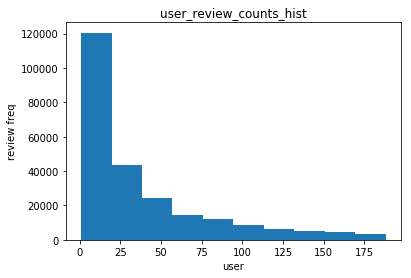

In [89]:
plt.hist([u for u in user_ratings_counts if u < outlier])
# plt.hist(user_ratings_counts )
plt.title("user_review_counts_hist")
plt.xlabel("user")
plt.ylabel("review freq")

fig = plt.gcf()

### MSE Accuracy Metric

In [46]:
def evaluate_model(model, user_product_ratings_test):
    pred = model.predict(user_product_ratings_test[['user_id', 'product_id']])
    mse = np.mean((pred - user_product_ratings_test.rating) ** 2.)
    print(f'MSE: {mse:.2f}')
    return mse

In [50]:
model = RandomModel()
model.fit(train)
evaluate_model(model, train['user_product_ratings'])

MSE: 2.88


2.87868